# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1 (Adriana Arce Jaimes): https://adrianaarce233.github.io/ 
- Integrante 2: ________________

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

## Resolución

Explicación previa: Las variables que analizaremos a continuación son la tasa referencial y las expectativas macroeconómicas. Elegimos estas variables con la finalidad de poder visualizar los cambios en la política monetaria y sus efectos en la economía. A continuación, presentaremos razones por las cuales nuestro análisis es relevante en la coyuntura actual. La tasa referencial, en los últimos días, se ha colocado en 6.5% con la finalidad de seguir manteniendo a la baja la inflación y prevenir efectos adversos del fenómeno del niño costero. Por otro lado, las expectativas macroeconómicas son un indicador crucial del sentimiento económico de las políticas fiscales y monetarias. En un contexto de inflación fuera de los parámetros meta y recesión, observar estas dos variables en forma conjunta se presenta como una herramienta esencial para coordinar los esfuerzos para generar políticas expansivas sin descuidar el panorama inflacionario nacional e internacional.

1. Analizaremos una serie temporal de las tasas de referencia del BCRP.


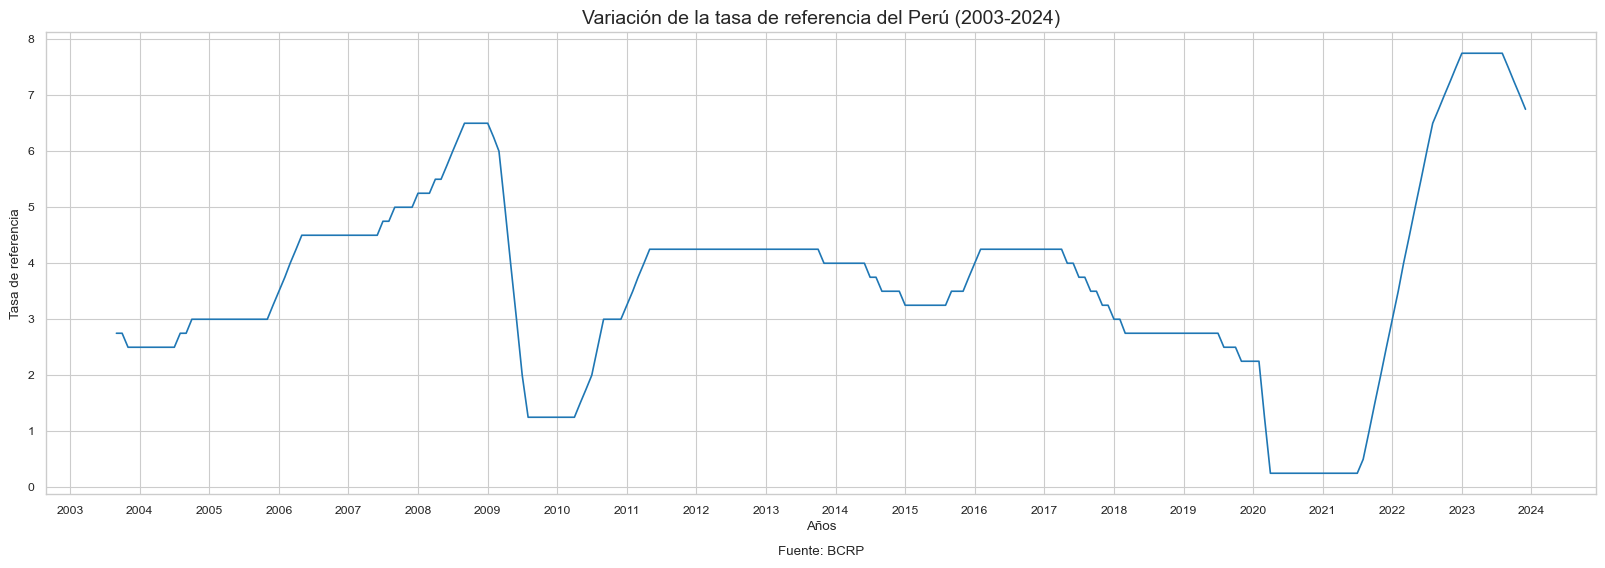

In [89]:
# Importamos bibliotecas:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Obtenemos los datos de la API del BCRP:
response = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04722MM/json/2003/2024/esp")
data = response.json()

# Extraemos los datos de la tasa referencial del BCRP
tasa_data = [{"month & year": item["name"], "tasa de referencia": float(item["values"][0])} for item in data["periods"]]

# Creamos el DataFrame de las tasas referenciales
df_tasas = pd.DataFrame(tasa_data)

# Diccionario para mapear los nombres de los meses del español al inglés
month_map = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Función para convertir los nombres de los meses del español al inglés
def convert_month_name(date_str):
    for esp, eng in month_map.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Aplica la función a la columna 'month & year'
df_tasas['month & year'] = df_tasas['month & year'].apply(convert_month_name)

# Ahora puedes convertir la columna 'month & year' a formato datetime
df_tasas['month & year'] = pd.to_datetime(df_tasas['month & year'], format='%b.%Y')

# Ordenamos el DataFrame por fecha
df_tasas.sort_values('month & year', inplace=True)

# Creamos el primer gráfico
# 1. Crea la figura y el eje
fig, ax = plt.subplots(figsize=(20, 6))

# 2. Dibujamos los datos
ax.plot(df_tasas['month & year'], df_tasas['tasa de referencia'])

# 3. Configuramos el formato de las fechas en el eje x
years = mdates.YearLocator()   # cada año
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 4. Configuramos las etiquetas y el título
ax.set_xlabel('Años')
ax.set_ylabel('Tasa de referencia')
ax.set_title('Variación de la tasa de referencia del Perú (2003-2024)', fontsize=14)

# 5. Definimos la cuadrícula
ax.grid(True)

plt.text(0.5, -0.125, 'Fuente: BCRP', ha='center', va='center', transform=plt.gca().transAxes)

# 6. Mostramos el gráfico
plt.show()


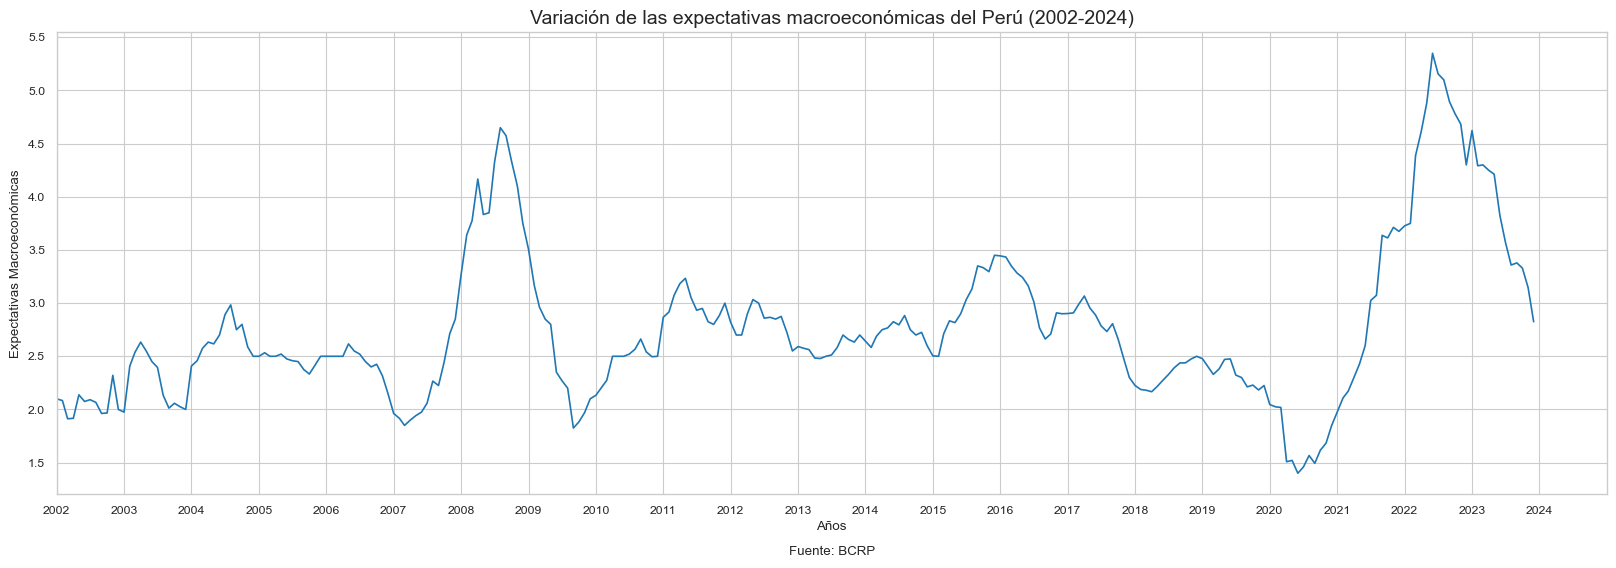

In [90]:
#Ahora analizaremos las expectativas macroeconómicas:
# Importamos bibliotecas:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Obtenemos los datos de la API del BCRP:
response = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD12912AM/json/2002/2024/esp")
datas = response.json()  # Mantenido como 'datas'

# Extraemos los datos de las expectativas macroeconómicas del BCRP
expectativas_data = [{"month & year": item["name"], "expectativas macroeconómicas": float(item["values"][0])} for item in datas["periods"]]  # Cambiado de 'data' a 'datas'

# Creamos el DataFrame de las expectativas macroeconómicas
df_expectativas = pd.DataFrame(expectativas_data)

# Diccionario para mapear los nombres de los meses del español al inglés
month_map = {
    'Ene': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'May': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dic': 'Dec'
}

# Función para convertir los nombres de los meses del español al inglés
def convert_month_name(date_str):
    for esp, eng in month_map.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Aplica la función a la columna 'month & year'
df_expectativas['month & year'] = df_expectativas['month & year'].apply(convert_month_name)

# Ahora puedes convertir la columna 'month & year' a formato datetime
df_expectativas['month & year'] = pd.to_datetime(df_expectativas['month & year'], format='%b.%Y')

# Ordenamos el DataFrame por fecha
df_expectativas.sort_values('month & year', inplace=True)

# Creamos el primer gráfico
# 1. Crea la figura y el eje
fig, ax = plt.subplots(figsize=(20, 6))

# 2. Dibujamos los datos
ax.plot(df_expectativas['month & year'], df_expectativas['expectativas macroeconómicas'])

# 3. Configuramos el formato de las fechas en el eje x
years = mdates.YearLocator()   # cada año
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# 4. Configuramos las etiquetas y el título
ax.set_xlabel('Años')
ax.set_ylabel('Expectativas Macroeconómicas')
ax.set_title('Variación de las expectativas macroeconómicas del Perú (2002-2024)', fontsize=14)

# 5. Definimos la cuadrícula
ax.grid(True)

# 6. Limitamos el rango del eje x
ax.set_xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2024-12-31'))

plt.text(0.5, -0.125, 'Fuente: BCRP', ha='center', va='center', transform=plt.gca().transAxes)

# 7. Mostramos el gráfico
plt.show()

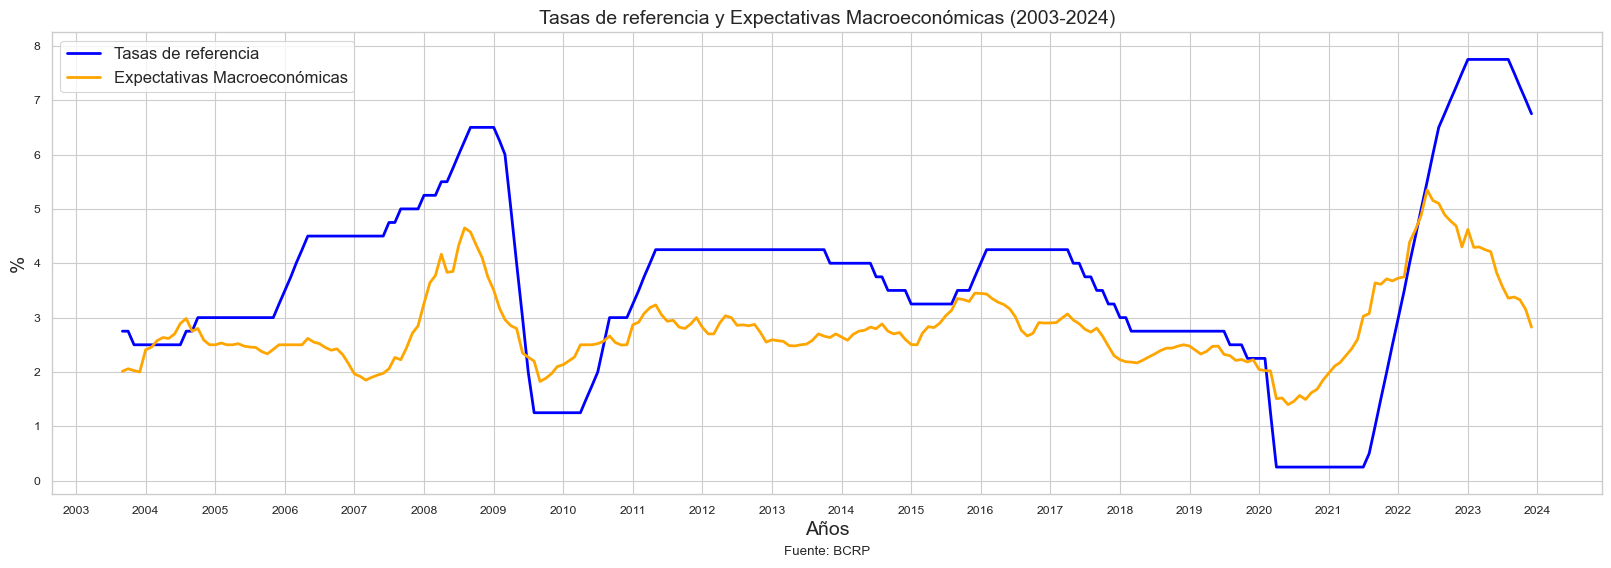

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Ahora juntaremos los gráficos de las tasas de referencial y las expectativas macroeconómicas:
# 1. Filtramos los DataFrames para incluir solo los datos a partir del año 2003
df_tasas = df_tasas[df_tasas['month & year'].dt.year >= 2003]
df_expectativas = df_expectativas[df_expectativas['month & year'].dt.year >= 2003]

# 2. Ahora juntamos los gráficos de las tasas de referencial y las expectativas macroeconómicas:
df4 = df_tasas.merge(df_expectativas, on='month & year')

# 3. Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

# 4. Dibujamos las líneas
ax.plot(df4['month & year'], df4['tasa de referencia'], color='blue', linewidth=2, label='Tasas de referencia')
ax.plot(df4['month & year'], df4['expectativas macroeconómicas'], color='orange', linewidth=2, label='Expectativas Macroeconómicas')

# 5. Configuramos las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Años', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_title('Tasas de referencia y Expectativas Macroeconómicas (2003-2024)', fontsize=14)

# 6. Configuramos el formato de las fechas en el eje x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 7. Añadimos la leyenda
ax.legend(fontsize=12)

# 8. Añadimos una cuadrícula para facilitar la lectura del gráfico
ax.grid(True)

# 9. Ajustamos los límites del eje y para que haya un poco de espacio por encima y por debajo de las líneas
ax.set_ylim([min(min(df4['tasa de referencia']), min(df4['expectativas macroeconómicas'])) - 0.5,
             max(max(df4['tasa de referencia']), max(df4['expectativas macroeconómicas'])) + 0.5])

plt.text(0.5, -0.125, 'Fuente: BCRP', ha='center', va='center', transform=plt.gca().transAxes)

# 10. Mostramos el gráfico
plt.show()


Conclusión de los gráficos: Se puede observar que existen dos picos de las expectativas macroeconómicas y estas corresponden a la crisis financiera del año 2008 y el año 2022, año en el que el crecimiento económico empezaría a disminuir hasta llegar a una recesión económica en el año 2023. Para esos picos, las tasas de referencia también se colocaron en sus valores máximos con el fin de estancar el crecimiento apresurado de las expectativas macroeconómica. De esta manera es que se reafirma la relevancia de estudiar estas dos variables de manera conjunta.

2. Analizaremos una nota informativa del BCRP respecto a la última tasa de referencia.

In [ ]:
#!pip install nltk
import nltk
import requests
import PyPDF2
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
#Importamos nuestro texto en pdf
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text

pdf_path = 'nota-informativa-2024-01-11.pdf'
pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text)


NOTA INFORMATIVA 
 
PROGRAMA MONETARIO  DE ENERO  2024  
BCRP REDUJO  LA TASA DE INTERÉS  DE REFERENCIA A 6,50%  
 
1. El Directorio del Banco Central de Reserva del Perú (BCRP) acordó reducir la tasa de interés de referencia 
en 25 puntos básicos a 6,50 por ciento. Esta decisión no necesariamente implica un ciclo de reducciones 
sucesivas en la tasa de interés. Los futuros ajustes en la tasa de referencia estarán condicionados a la nueva 
información sobre la inflación y sus determinantes .  
 
2. La decisión de reducir la tasa de referencia tomó en cuenta la información y las proyecciones siguientes : 
 
i. En diciembre la tasa mensual de inflación fue 0,41 por ciento y la inflación sin alimentos y energía fue 
0,36 por ciento. La tasa de inflación a doce meses se redujo de 3,6 por ciento en noviembre a 3,2 por 
ciento en diciembre , mientras que la tasa de inflación sin alimentos y energía a doce meses disminuyó 
de 3,1 por ciento en noviembre a 2,9 por ciento en diciembre. Ambos in

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from collections import Counter
from nltk.stem import WordNetLemmatizer 
len(pdf_text)
tokens = word_tokenize(pdf_text)
lower_tokens = [t.lower() for t in tokens]
lower_tokens
bowl_simple = Counter(lower_tokens)
print(bowl_simple.most_common(20))
stopwords = nltk.corpus.stopwords.words('spanish')


[('de', 58), ('la', 35), ('.', 34), ('en', 25), ('y', 19), ('el', 17), (',', 17), ('a', 14), ('inflación', 14), ('por', 13), ('las', 11), ('ciento', 10), ('tasa', 9), ('los', 9), ('del', 8), ('se', 8), ('operaciones', 8), ('diciembre', 6), ('meses', 6), ('interés', 5)]


In [ ]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

[('inflación', 14), ('ciento', 10), ('tasa', 9), ('operaciones', 8), ('diciembre', 6), ('me', 6), ('interés', 5), ('directorio', 5), ('referencia', 4), ('alimentos', 4)]


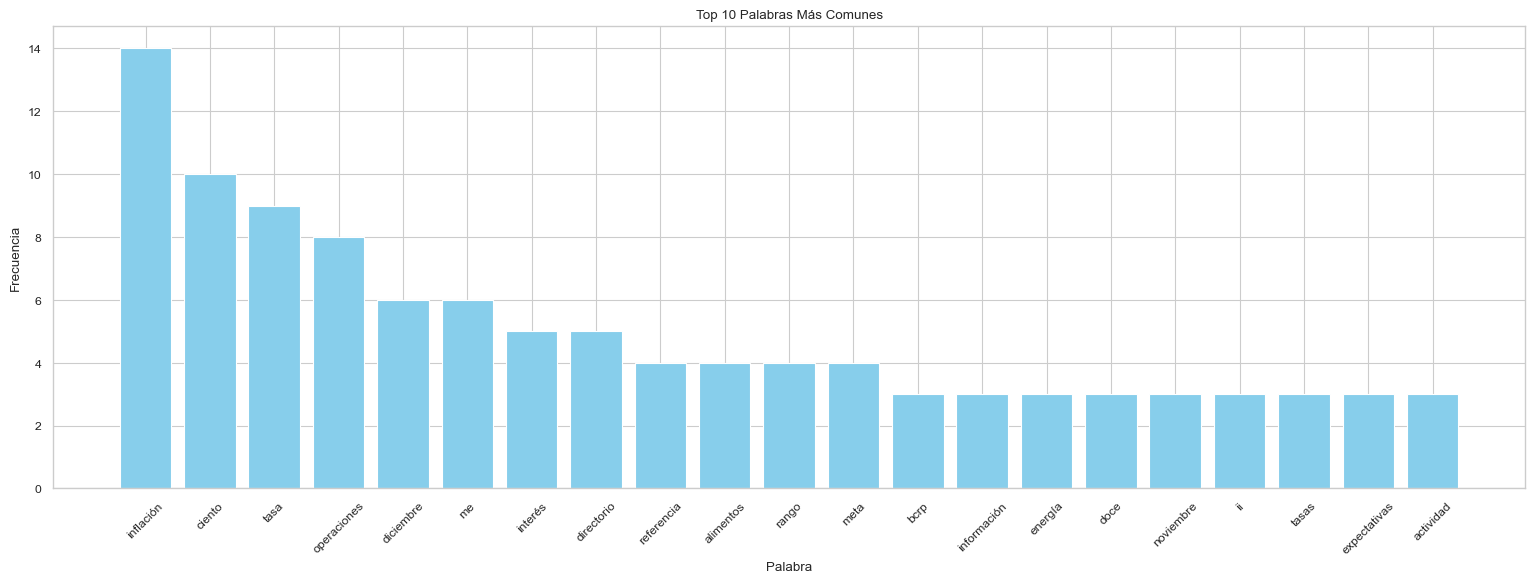

In [ ]:
# Print the 10 most common tokens
print(bow.most_common(10))
import matplotlib.pyplot as plt
# Graficar las 10 palabras más comunes
top_words = bow.most_common(21)
words, frequencies = zip(*top_words)

plt.figure(figsize=(19, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Palabras Más Comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Obtener las palabras y frecuencias
top_words = bow.most_common(21)
words, frequencies = zip(*top_words)

# Crear un DataFrame de pandas con las palabras y frecuencias
tabla = pd.DataFrame({'Palabra': words, 'Frecuencia': frequencies})

# Imprimir la tabla de frecuencias
print(tabla)


         Palabra  Frecuencia
0      inflación          14
1         ciento          10
2           tasa           9
3    operaciones           8
4      diciembre           6
5             me           6
6        interés           5
7     directorio           5
8     referencia           4
9      alimentos           4
10         rango           4
11          meta           4
12          bcrp           3
13   información           3
14       energía           3
15          doce           3
16     noviembre           3
17            ii           3
18         tasas           3
19  expectativas           3
20     actividad           3


In [ ]:
#En base a la frecuencia de las palabras usadas, se puede inferir que se ha hecho mucho énfasis al tema central de la nota informativa sobre la tasa de
#interés, sin embargo, la palabra con mayor frecuencia fue inflación, por lo tanto, se puede inferir que la motivación de la medida adoptada es para 
#tratar de controlarla
